# Testing re-orientation in shearflow

The result should match Figure 5 in
Phelps, Jay H, Tucker, Charles L: "An anisotropic rotary diffusion
model for fiber orientation in short- and long-fiber thermoplastics",
Journal of Non-Newtonian Fluid Mechanics, 156, 3, 2009:
DOI: 10.1016/j.jnnfm.2008.08.002.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from fiberoripy.orientation import ard_rsc_ode

In [3]:
# geometric factor
xi = 1.0

# time steps
t = np.linspace(0, 4000, 500)

# initial fiber orientation state
A0 = 1.0 / 3.0 * np.eye(3)

In [4]:
# define a function that describes the (time-dependend) velocity gradient
def L(t):
    """Velocity gradient."""
    return np.array([[0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])

In [5]:
# compute solution by integrating the ODE
A = odeint(
    ard_rsc_ode,
    A0.ravel(),
    t,
    args=(xi, L, 1.924e-4, 1.0 / 30.0, 5.839e-3, 0.04, 1.168e-5, 0.0),
)

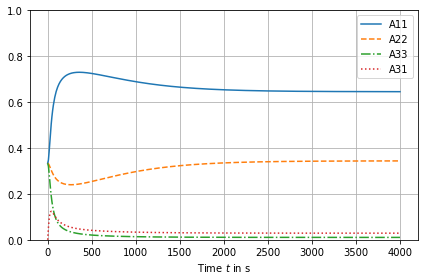

In [6]:
# plot components
plt.plot(t, A[:, 0], "-", label="A11")
plt.plot(t, A[:, 4], "--", label="A22")
plt.plot(t, A[:, 8], "-.", label="A33")
plt.plot(t, A[:, 2], ":", label="A31")

# adjust some plot settings.
plt.xlabel("Time $t$ in s")
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()